# Objective: Explore and preprocess the Tips dataset by visualizing, encoding categorical variables, and preparing data for analysis and modeling.

# Q1: Load the data from the Tips.csv file and perform initial exploratory data analysis (EDA).

**Import the necessary libraries: pandas, numpy, matplotlib, and seaborn.**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/tipsdataset/tips.csv')

In [3]:
# Display the first few rows of the dataframe
print(df.head())

   total_bill   tip     sex smoker  day    time  size  price_per_person  \
0       16.99  1.01  Female     No  Sun  Dinner     2              8.49   
1       10.34  1.66    Male     No  Sun  Dinner     3              3.45   
2       21.01  3.50    Male     No  Sun  Dinner     3              7.00   
3       23.68  3.31    Male     No  Sun  Dinner     2             11.84   
4       24.59  3.61  Female     No  Sun  Dinner     4              6.15   

           Payer Name         CC Number Payment ID  
0  Christy Cunningham  3560325168603410    Sun2959  
1      Douglas Tucker  4478071379779230    Sun4608  
2      Travis Walters  6011812112971322    Sun4458  
3    Nathaniel Harris  4676137647685994    Sun5260  
4        Tonya Carter  4832732618637221    Sun2251  


In [4]:
# Check for any missing values in the dataset
print(df.isnull().sum())


total_bill          0
tip                 0
sex                 0
smoker              0
day                 0
time                0
size                0
price_per_person    0
Payer Name          0
CC Number           0
Payment ID          0
dtype: int64


In [5]:
# Display summary statistics of the dataset
print(df.describe(include='all'))

        total_bill         tip   sex smoker  day    time        size  \
count   244.000000  244.000000   244    244  244     244  244.000000   
unique         NaN         NaN     2      2    4       2         NaN   
top            NaN         NaN  Male     No  Sat  Dinner         NaN   
freq           NaN         NaN   157    151   87     176         NaN   
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672   
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100   
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000   
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000   
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000   
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000   
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000   

        price_per_person          Payer Name     CC Number Payment ID  
count         244.000000                 244  2.440000e+02     

# Q2: Visualize the distribution of categorical variables.

**Identify the categorical columns in the dataset**

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['sex', 'smoker', 'day', 'time', 'Payer Name', 'Payment ID'], dtype='object')


**Create bar plots for each of the categorical variables in the dataset.**

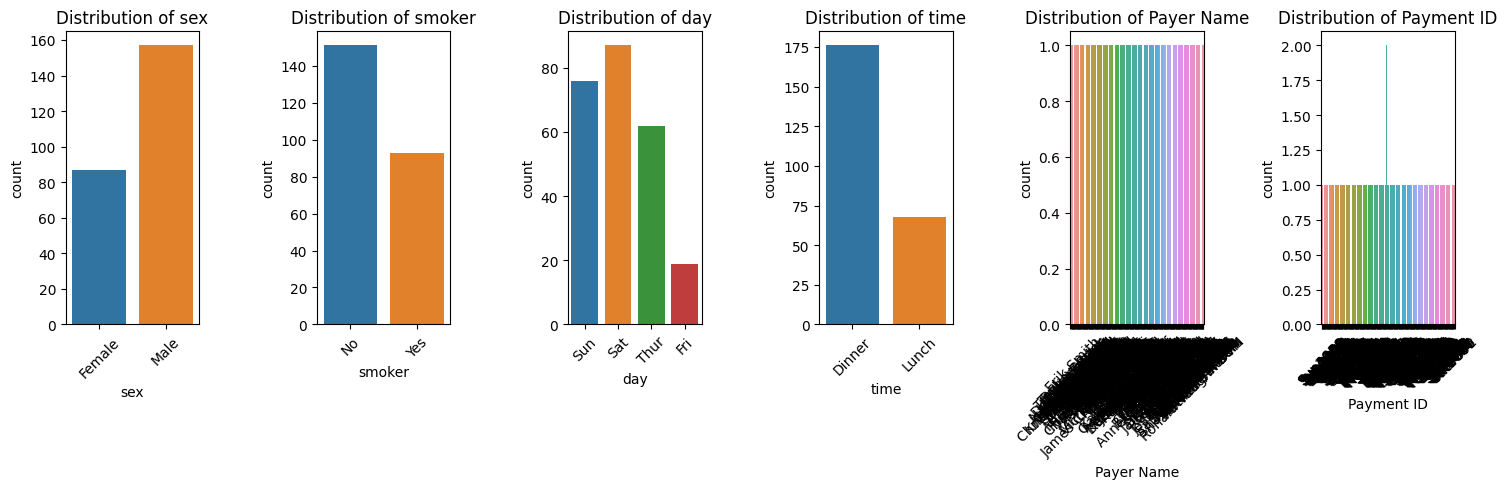

In [7]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Q3: Convert categorical variables to numeric using Label Encoding.

**Import the LabelEncoder from sklearn.preprocessing.**

In [8]:
from sklearn.preprocessing import LabelEncoder

**Apply LabelEncoder to each of the categorical variables and convert them into numeric format.**

**Create a copy of the dataframe for label encoding**

In [9]:
df_label_encoded = df.copy()

**Initialize LabelEncoder**

In [10]:
label_encoder = LabelEncoder()

**Apply LabelEncoder to each categorical variable**

In [11]:
for col in categorical_columns:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])

**Display the first few rows of the transformed dataframe.**

In [12]:
# Display the first few rows of the transformed dataframe
print(df_label_encoded.head())

   total_bill   tip  sex  smoker  day  time  size  price_per_person  \
0       16.99  1.01    0       0    2     0     2              8.49   
1       10.34  1.66    1       0    2     0     3              3.45   
2       21.01  3.50    1       0    2     0     3              7.00   
3       23.68  3.31    1       0    2     0     2             11.84   
4       24.59  3.61    0       0    2     0     4              6.15   

   Payer Name         CC Number  Payment ID  
0          40  3560325168603410         122  
1          58  4478071379779230         138  
2         233  6011812112971322         134  
3         180  4676137647685994         143  
4         230  4832732618637221         116  


# Q4: Convert categorical variables to numeric using One-Hot Encoding.

**Use pd.get_dummies() to apply One-Hot Encoding to the categorical variables.**

In [13]:
# Apply One-Hot Encoding to the categorical variables
df_one_hot_encoded = pd.get_dummies(df, columns=categorical_columns)

**Display the first few rows of the transformed dataframe.**

In [14]:
# Display the first few rows of the transformed dataframe
print(df_one_hot_encoded.head())

   total_bill   tip  size  price_per_person         CC Number  sex_Female  \
0       16.99  1.01     2              8.49  3560325168603410        True   
1       10.34  1.66     3              3.45  4478071379779230       False   
2       21.01  3.50     3              7.00  6011812112971322       False   
3       23.68  3.31     2             11.84  4676137647685994       False   
4       24.59  3.61     4              6.15  4832732618637221        True   

   sex_Male  smoker_No  smoker_Yes  day_Fri  ...  Payment ID_Thur9003  \
0     False       True       False    False  ...                False   
1      True       True       False    False  ...                False   
2      True       True       False    False  ...                False   
3      True       True       False    False  ...                False   
4     False       True       False    False  ...                False   

   Payment ID_Thur9005  Payment ID_Thur9313  Payment ID_Thur9318  \
0                False        

**Compare the new dataframe with the label encoded dataframe.**

In [15]:
# Compare the new dataframe with the label-encoded dataframe
print("Shape of Label Encoded DataFrame:", df_label_encoded.shape)
print("Shape of One-Hot Encoded DataFrame:", df_one_hot_encoded.shape)

Shape of Label Encoded DataFrame: (244, 11)
Shape of One-Hot Encoded DataFrame: (244, 502)
